# Selecting Dataset - Sleem in Mammals



In [122]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("volkandl/sleep-in-mammals")

print("Path to dataset files:", path)


Path to dataset files: C:\Users\matan\.cache\kagglehub\datasets\volkandl\sleep-in-mammals\versions\1


In [123]:
import pandas as pd
# !pip install seaborn
import seaborn as sns

import matplotlib.pyplot as plt
import kagglehub

# Download latest version
path = kagglehub.dataset_download("volkandl/sleep-in-mammals")

# Load the dataset
df = pd.read_csv(f"{path}/mammals.csv")

missing_values = df.isnull().sum()
print(missing_values)



species          0
body_wt          0
brain_wt         0
non_dreaming    14
dreaming        12
total_sleep      4
life_span        4
gestation        4
predation        0
exposure         0
danger           0
dtype: int64


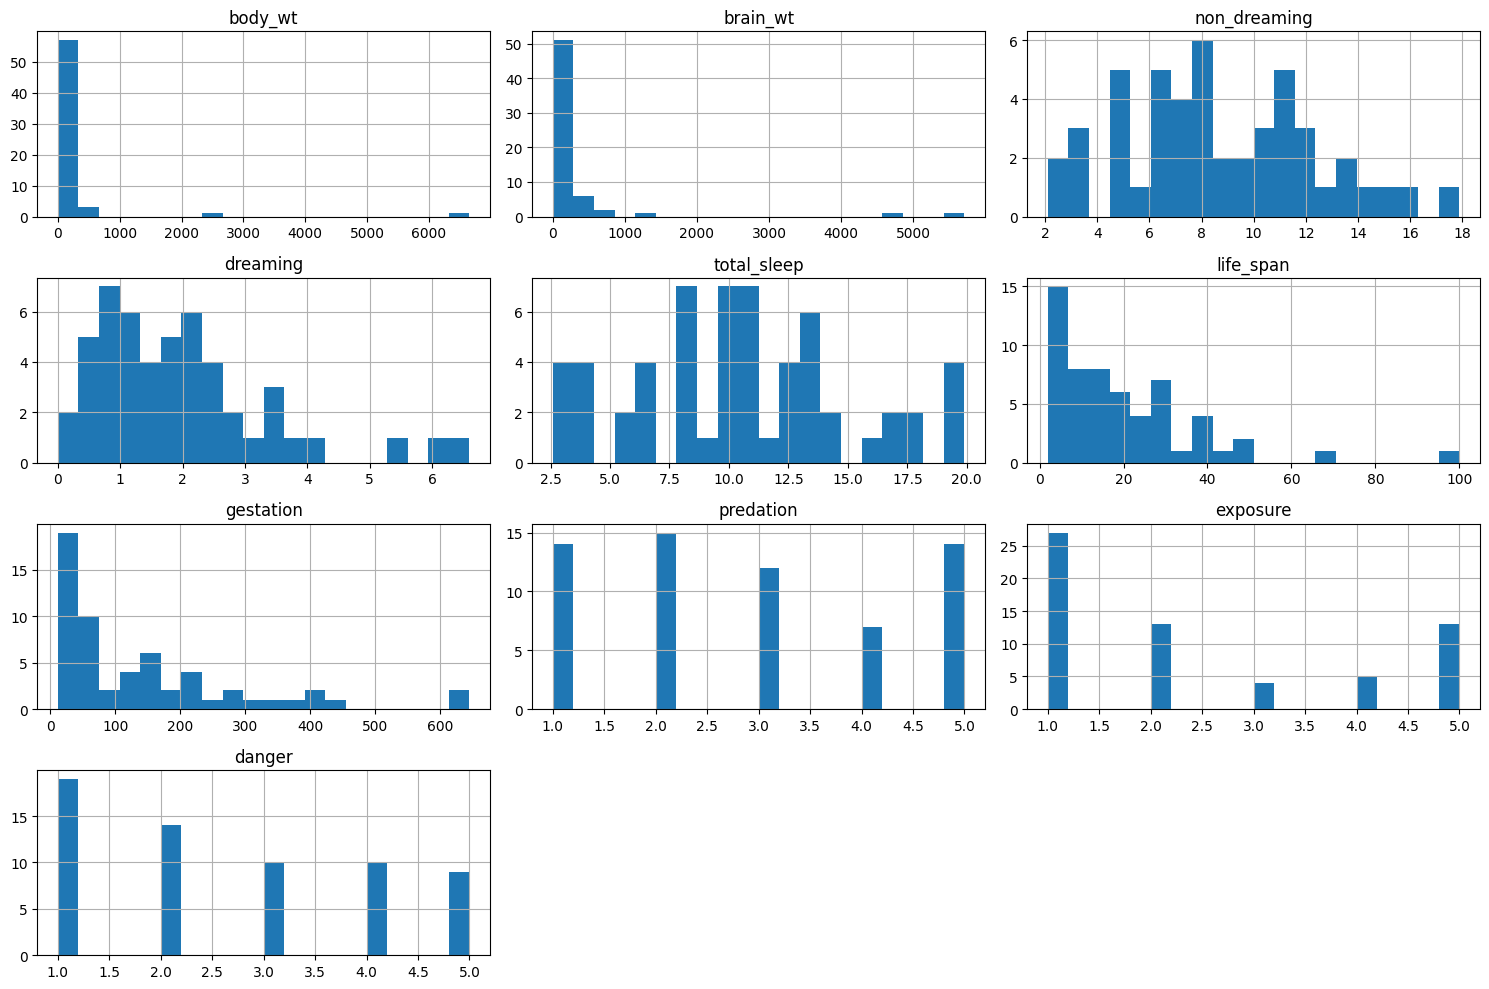

In [124]:
df.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

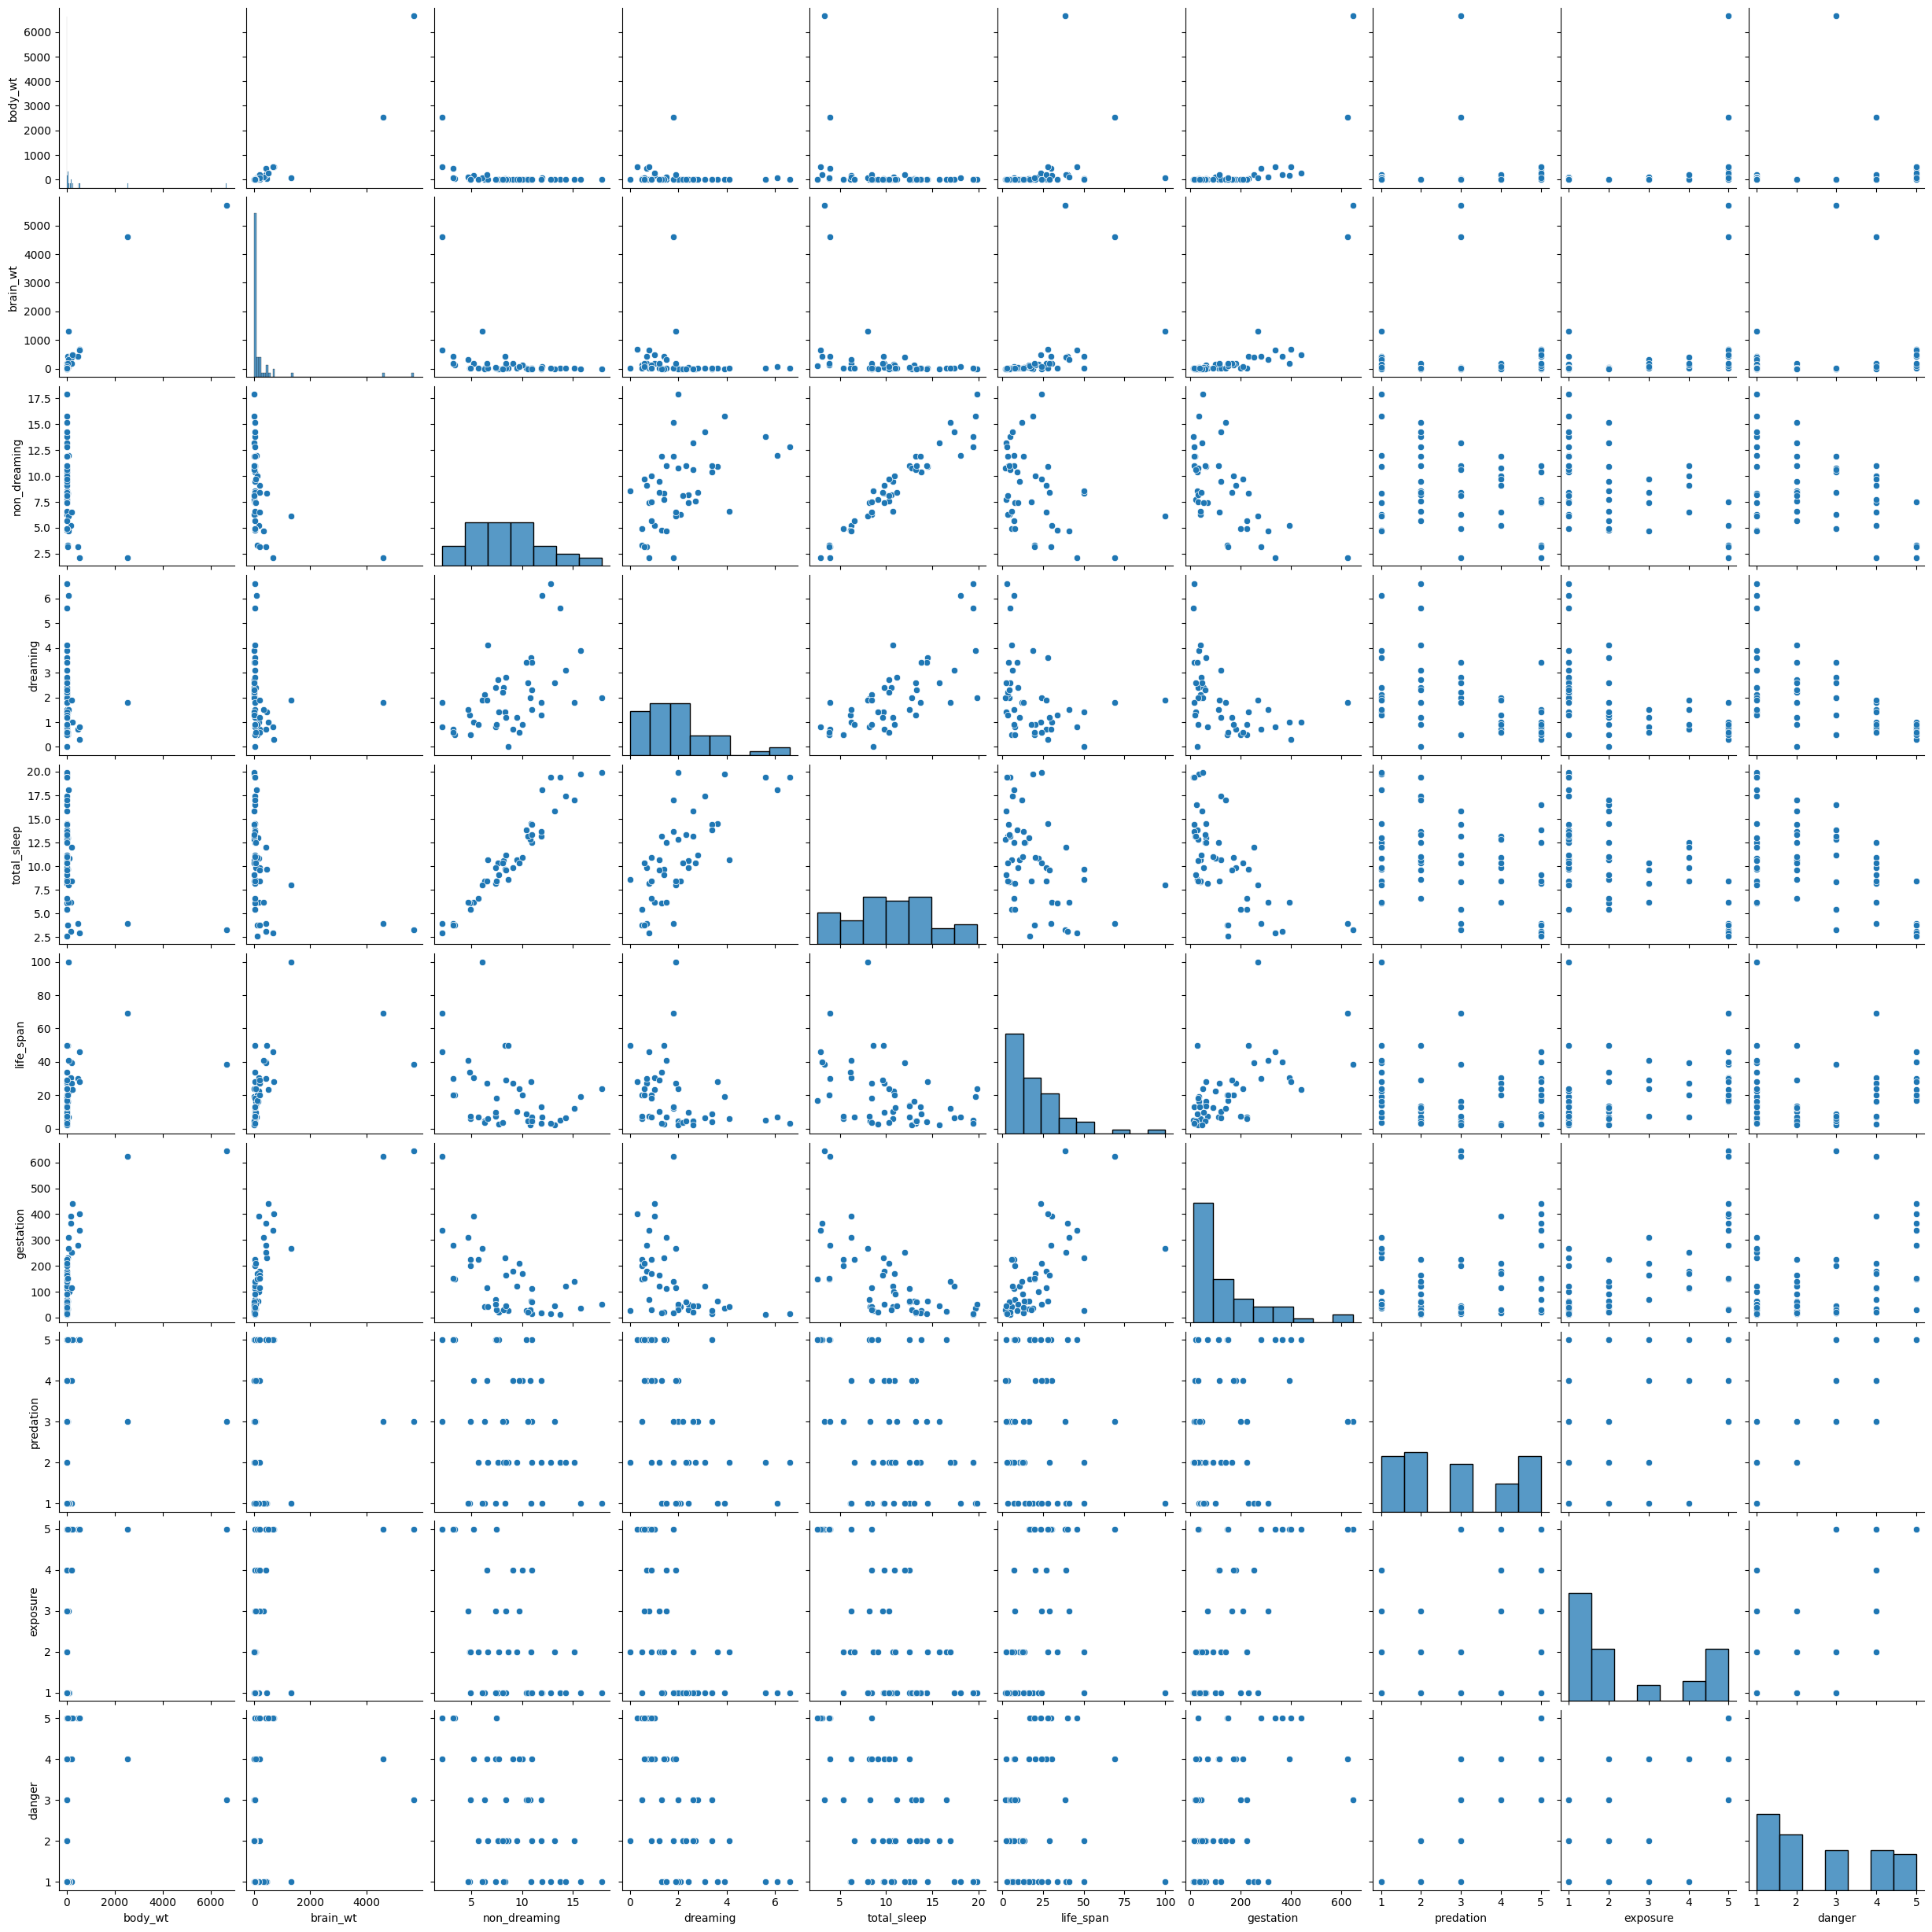

In [125]:
sns.pairplot(df)
plt.show()

In [126]:
def df_missing_value_indicator(df, feature_name):
    missing_indicator_name = f"{feature_name}_missing_indicator"
    df[missing_indicator_name] = df[feature_name].isnull().astype(int)
    return df

df_dreaming_indicator = df_missing_value_indicator(df, "dreaming")
df_no_null = df_dreaming_indicator.dropna(axis=0)


In [127]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


def train_logistic_regression(X, y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Create and train the logistic regression model
    log_reg = LogisticRegression(max_iter=1000)
    log_reg.fit(X_train, y_train)

    # Make predictions
    y_pred = log_reg.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f"Accuracy: {accuracy}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)


# Define the features and target variable
X = df_no_null.drop(columns=['species', 'danger'])
y_train = df_no_null['danger']
train_logistic_regression(X, y_train)


Accuracy: 0.6153846153846154
Confusion Matrix:
[[2 0 0 0 0]
 [0 2 0 1 0]
 [0 0 0 0 0]
 [0 0 2 2 1]
 [0 0 1 0 2]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      0.67      0.80         3
           3       0.00      0.00      0.00         0
           4       0.67      0.40      0.50         5
           5       0.67      0.67      0.67         3

    accuracy                           0.62        13
   macro avg       0.67      0.55      0.59        13
weighted avg       0.79      0.62      0.68        13



In [128]:
df_dreaming_indicator.columns


Index(['species', 'body_wt', 'brain_wt', 'non_dreaming', 'dreaming',
       'total_sleep', 'life_span', 'gestation', 'predation', 'exposure',
       'danger', 'dreaming_missing_indicator'],
      dtype='object')

In [129]:
def balance_df(df, column_name):
# Separate the rows where dreaming_missing_indicator is 1 and 0
    df_1 = df[df[column_name] == 1]
    df_0 = df[df[column_name] == 0]

    # Calculate the number of rows to duplicate
    num_to_duplicate = len(df_0) - len(df_1)

    # Duplicate the rows
    df_1_duplicated = df_1.sample(n=num_to_duplicate, replace=True)

    # Concatenate the original dataframe with the duplicated rows
    df_balanced = pd.concat([df, df_1_duplicated])

    # Shuffle the dataframe
    df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)

    print(df_balanced[column_name].value_counts())
    return df_balanced

In [130]:
missing_columns = ['dreaming', 'non_dreaming', 'total_sleep', 'life_span', 'gestation']
for column in missing_columns:
    print('trying to predict:', column)
    df_with_indicator = df_missing_value_indicator(df, column)
    df_balanced = df_with_indicator.copy()
    X = df_balanced.drop(columns=['species', 'danger', column, f'{column}_missing_indicator'])
    X  = X.fillna(X.mean())
    y_train = df_balanced['dreaming_missing_indicator']
    train_logistic_regression(X, y_train)
    print('\n\n')

trying to predict: dreaming
Accuracy: 0.6842105263157895
Confusion Matrix:
[[13  0]
 [ 6  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      1.00      0.81        13
           1       0.00      0.00      0.00         6

    accuracy                           0.68        19
   macro avg       0.34      0.50      0.41        19
weighted avg       0.47      0.68      0.56        19




trying to predict: non_dreaming
Accuracy: 0.7894736842105263
Confusion Matrix:
[[12  1]
 [ 3  3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.92      0.86        13
           1       0.75      0.50      0.60         6

    accuracy                           0.79        19
   macro avg       0.78      0.71      0.73        19
weighted avg       0.78      0.79      0.78        19




trying to predict: total_sleep
Accuracy: 0.8421052631578947
Confusion Matrix:
[[12  1]
 [ 2  4]]
Class

# Wine Quality Database

In [131]:
import kagglehub
import pandas as pd
import seaborn as sns
from xgboost import XGBClassifier
import optuna
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import warnings 
warnings.filterwarnings('ignore')


# Download latest version
path = kagglehub.dataset_download("taweilo/wine-quality-dataset-balanced-classification")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\matan\.cache\kagglehub\datasets\taweilo\wine-quality-dataset-balanced-classification\versions\1


In [132]:
wine_df = pd.read_csv(f"{path}/wine_data.csv")
wine_df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,9.797079,0.774796,0.793870,31.289348,0.200245,129.442333,229.008762,1.009972,3.158712,1.020641,11.291716,6.000000
std,2.413919,0.365015,0.384833,19.015391,0.124933,77.167262,100.183265,0.012032,0.171371,0.408304,1.182198,2.000048
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,7.600000,0.430000,0.410000,9.800000,0.072000,45.000000,150.000000,0.997417,3.030000,0.620000,10.400000,4.000000
50%,10.000000,0.830000,0.870000,37.600000,0.205000,145.800000,240.500000,1.012200,3.150000,1.080000,11.300000,6.000000
75%,11.800000,1.080000,1.110000,46.800000,0.298000,194.325000,311.625000,1.019840,3.270000,1.360000,12.200000,8.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


<AxesSubplot:>

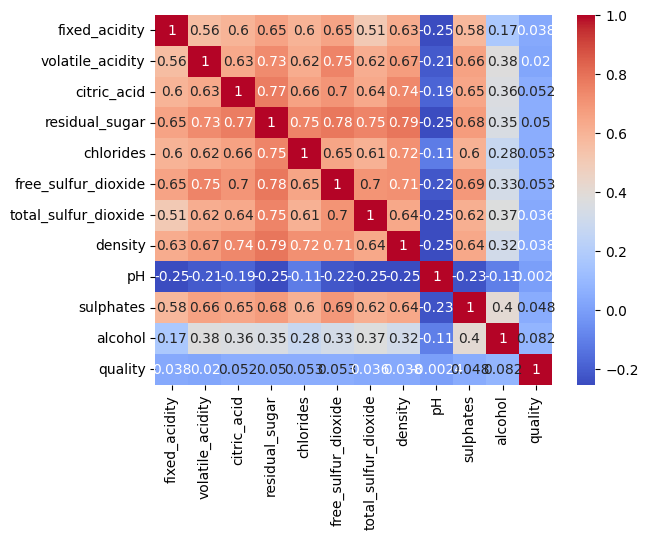

In [133]:
sns.heatmap(wine_df.corr(), annot=True, cmap='coolwarm')

In [134]:
y_train = wine_df['quality']
y_train = y_train-3
X = wine_df.drop(columns=['quality'])
X_train, X_test, y_train, y_test = train_test_split(X, y_train, test_size=0.2, random_state=42)

In [135]:
# Define objective function for Optuna optimization
def objective(trial):
    # Hyperparameter search space
    param_grid = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 1),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 1),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.1, 1)
    }
    
    # Create and train the XGBClassifier with the suggested hyperparameters
    model = XGBClassifier(
        objective='multi:softmax',  # For multiclass classification
        num_class=7,               # Number of classes
        eval_metric='mlogloss',     # Multiclass log loss
        use_label_encoder=False,   # Avoid warnings in newer XGBoost versions
        **param_grid
    )
    
    # Cross-validation for performance estimation
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    return score.mean()  # Return the mean accuracy

# Set up and run Optuna study
study = optuna.create_study(direction='maximize')  # We want to maximize accuracy
study.optimize(objective, n_trials=10)  # Perform optimization over 50 trials

# Get the best hyperparameters found by Optuna
best_params = study.best_params
print(f"Best Hyperparameters: {best_params}")

[I 2025-01-27 18:33:05,962] A new study created in memory with name: no-name-1a6b98a2-ba87-4480-9177-b6fcab30c670
[I 2025-01-27 18:33:21,249] Trial 0 finished with value: 0.39369047619047615 and parameters: {'max_depth': 4, 'learning_rate': 0.06552617903701805, 'n_estimators': 156, 'subsample': 0.7759372801609992, 'colsample_bytree': 0.6633347088845293, 'gamma': 0.23066614200926983, 'reg_alpha': 0.028046861609987483, 'reg_lambda': 0.6833849616170574}. Best is trial 0 with value: 0.39369047619047615.
[I 2025-01-27 18:33:52,459] Trial 1 finished with value: 0.571547619047619 and parameters: {'max_depth': 10, 'learning_rate': 0.12853531864417672, 'n_estimators': 114, 'subsample': 0.8116032749513586, 'colsample_bytree': 0.8052991248946, 'gamma': 0.44054966474193435, 'reg_alpha': 0.18238995149861437, 'reg_lambda': 0.7391532595389178}. Best is trial 1 with value: 0.571547619047619.
[I 2025-01-27 18:34:32,217] Trial 2 finished with value: 0.5605357142857142 and parameters: {'max_depth': 7, 'l

Best Hyperparameters: {'max_depth': 10, 'learning_rate': 0.12853531864417672, 'n_estimators': 114, 'subsample': 0.8116032749513586, 'colsample_bytree': 0.8052991248946, 'gamma': 0.44054966474193435, 'reg_alpha': 0.18238995149861437, 'reg_lambda': 0.7391532595389178}


In [136]:
# Train the model with the best hyperparameters
best_params =  {'max_depth': 10, 'learning_rate': 0.23823396572274735, 'n_estimators': 141, 'subsample': 0.8506979064285252, 'colsample_bytree': 0.821175777812565, 'gamma': 0.25413966716433245, 'reg_alpha': 0.736930567486492, 'reg_lambda': 0.34870051923508893}
best_model = XGBClassifier(
    objective='multi:softmax', 
    num_class=7, 
    eval_metric='mlogloss', 
    use_label_encoder=False,
    **best_params
)

best_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.61


In [137]:
print(wine_df.columns)
wine_df.describe()

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,9.797079,0.774796,0.793870,31.289348,0.200245,129.442333,229.008762,1.009972,3.158712,1.020641,11.291716,6.000000
std,2.413919,0.365015,0.384833,19.015391,0.124933,77.167262,100.183265,0.012032,0.171371,0.408304,1.182198,2.000048
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,7.600000,0.430000,0.410000,9.800000,0.072000,45.000000,150.000000,0.997417,3.030000,0.620000,10.400000,4.000000
50%,10.000000,0.830000,0.870000,37.600000,0.205000,145.800000,240.500000,1.012200,3.150000,1.080000,11.300000,6.000000
75%,11.800000,1.080000,1.110000,46.800000,0.298000,194.325000,311.625000,1.019840,3.270000,1.360000,12.200000,8.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [138]:
from missing_clf import *

target_feature = 'quality'
null_feature = 'volatile_acidity'
role_feature = 'fixed_acidity'
missing_cond = lambda x: x[x[role_feature] > np.mean(x[role_feature])]


In [139]:
missing_feature = 'chlorides'

new_df = remove_at_random(wine_df, missing_feature, 0.3, lambda x: x[x[role_feature] > np.mean(x[role_feature])])
# new_df = remove_complitly_at_random(wine_df, missing_feature, 0.3)
# new_df = remove_not_at_random(df_full, missing_feature, 0.3, lambda x: x[x[role_feature] > 2000], role_feature)
new_df[missing_feature].isnull().sum()

3316

In [140]:
from missing_clf import classify_missing_values

new_df = remove_at_random(wine_df, missing_feature, 0.3, lambda x: x[x[role_feature] > np.mean(x[role_feature])])
# new_df = remove_complitly_at_random(wine_df, missing_feature, 0.3)
# new_df = remove_not_at_random(df_full, missing_feature, 0.3, lambda x: x[x[role_feature] > 2000], role_feature)

print('number of removed values:', new_df[missing_feature].isnull().sum())
acc = classify_missing_values(new_df, missing_feature)
acc

number of removed values: 3316
(4642, 11)
Classifier Accuracy: 0.7582914572864322
Classifier Confusion Matrix:
[[616 408]
 [ 73 893]]
Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.60      0.72      1024
           1       0.69      0.92      0.79       966

    accuracy                           0.76      1990
   macro avg       0.79      0.76      0.75      1990
weighted avg       0.79      0.76      0.75      1990

classifier accuracy is 0.7582914572864322 - MAR


0.7582914572864322

# Energy Consumption - Database

1000


<AxesSubplot:>

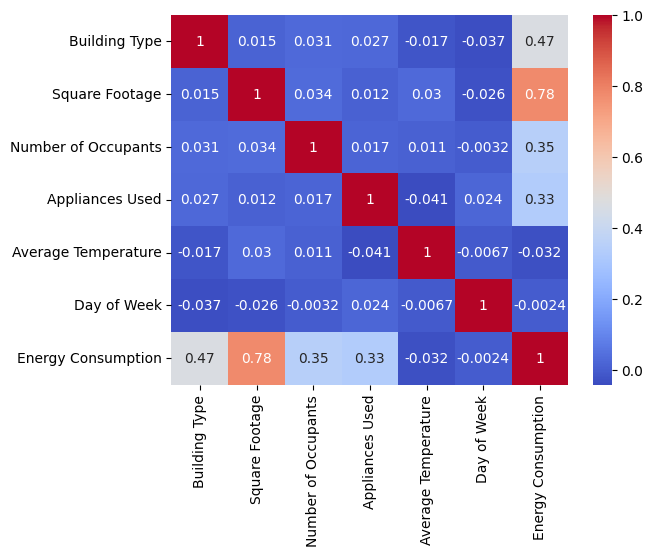

In [141]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
file_path = "/kaggle/input/energy-consumption-dataset-linear-regression/test_energy_data.csv"
# train_path = "input\energy_consumtion\\train_energy_data.csv"
# test_path = "input\energy-consumption\\test_energy_data.csv"
train_path = os.path.join('input', 'energy_consumtion', 'train_energy_data.csv')


def load_and_preprocess_data(file_path):    
    # Load the dataset
    data = pd.read_csv(file_path)

    # Map categorical features to numerical values
    building_type_map = {"Residential": 1, "Commercial": 2, "Industrial": 3}
    day_of_week_map = {"Weekday": 1, "Weekend": 0}

    data["Building Type"] = data["Building Type"].map(building_type_map)
    data["Day of Week"] = data["Day of Week"].map(day_of_week_map)
    return data

df = load_and_preprocess_data(train_path)
train_df, test_df = train_test_split(df, test_size=0.2)

# X_test = test_df.drop(columns=['Energy Consumption'])
# y_test = test_df['Energy Consumption']

print(len(df))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')


In [142]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import os
import seaborn as sns

def remove_complitly_at_random(df, feature_name, persentage):
    df = df.copy()
    n = int(df.shape[0] * persentage)
    df.loc[df.sample(n=n).index, feature_name] = None
    return df

def remove_at_random(df, feature_name, persentage, role_feature='Square Footage'):
    df = df.copy()
    df.loc[df[df[role_feature] == 1].sample(frac=persentage).index, feature_name] = None
    return df

def remove_not_at_random(df, feature_name, persentage, role_feature='Building Type'):
    df = remove_at_random(df, feature_name, persentage, role_feature)
    return df.drop(columns=[role_feature])


def classify_missing_values(missing_df, null_feature):
    # Create the None_indicator column
    missing_df['None_indicator'] = missing_df[null_feature].isnull().astype(int)

    # Separate the majority and minority classes
    df_majority = missing_df[missing_df['None_indicator'] == 0]
    df_minority = missing_df[missing_df['None_indicator'] == 1]

    # Downsample the majority class
    df_majority_downsampled = resample(df_majority, 
                                    replace=False,    # sample without replacement
                                    n_samples=len(df_minority),  # to match minority class
                                    random_state=42)  # reproducible results

    # Combine minority class with downsampled majority class
    df_balanced = pd.concat([df_majority_downsampled, df_minority])

    # Define the features and target variable for the classifier
    X_classifier = df_balanced.drop(columns=['None_indicator', null_feature])
    y_classifier = df_balanced['None_indicator']

    # Split the data into training and testing sets
    X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_classifier, y_classifier, test_size=0.3, random_state=42)

    # Create and train the logistic regression model
    classifier = LogisticRegression(max_iter=1000)
    classifier.fit(X_train_clf, y_train_clf)

    # Make predictions
    y_pred_clf = classifier.predict(X_test_clf)

    # Evaluate the model
    accuracy_clf = accuracy_score(y_test_clf, y_pred_clf)
    conf_matrix_clf = confusion_matrix(y_test_clf, y_pred_clf)
    class_report_clf = classification_report(y_test_clf, y_pred_clf)

    print(f"Classifier Accuracy: {accuracy_clf}")
    print("Classifier Confusion Matrix:")
    print(conf_matrix_clf)
    print("Classifier Classification Report:")
    print(class_report_clf)

    at_random_threshold = 0.8
    if accuracy_clf > at_random_threshold:
        print('the missing values are probably at random')
        
    else:
        print('classifier is bad')
        return None

In [143]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


def model_pred_impute(df: pd.DataFrame) -> pd.DataFrame:
    # split data
    df = df.copy()
    missing_column = df.columns[df.isnull().any()].tolist()[0]
    missing_column_idx = df.columns.get_loc(missing_column)
    X, y = df.drop(columns=[missing_column]), df[missing_column]
    X_train, y_train = X[~y.isnull()], y[~y.isnull()]
    X_test = X[y.isnull()]
    
    # select model
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    model = RandomForestRegressor()
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    mse = -grid_search.best_score_
    r2 = best_model.score(X_train, y_train)
    print(f"MSE: {mse:.2f}")
    print(f"R^2: {r2:.2f}")
    
    # impute missing values
    y_imputed = best_model.predict(X_test)
    X_test.insert(missing_column_idx, missing_column, y_imputed)
    X_train.insert(missing_column_idx, missing_column, y_train)
    df = pd.concat([X_train, X_test])
    df = df.sort_index()
    return df

def impute_df(df, method):
    missing_columns = df.columns[df.isnull().any()].tolist()
    if len(missing_columns) == 0:
        return df
    missing_column = missing_columns[0]
    print(f"Found {df[missing_column].isnull().sum()} missing values in {missing_column}")
    
    df = df.copy()
    if method == 'drop_na':
        df = df.dropna()
    elif method == 'mean':
        df = df.fillna(df.mean())
    elif method == '0':
        df = df.fillna(0)
    elif method == 'model_pred':
        df = model_pred_impute(df)
    return df

def impute_and_train(train_df, test_df, target_name, null_feature, missing_persentage=[0, 0.1, 0.2, 0.5, 0.7]):
    impute_methods = ['0', 'mean', 'drop_na', 'model_pred'] #, 'indicator prediction model', 'smart imputer']
    X_test = test_df.drop(columns=[target_name])
    y_test = test_df[target_name]
    rows = []

    for persentage in missing_persentage:
        print('--------- missing persentage:', persentage)
        df_missing = remove_at_random(train_df, null_feature, persentage)
        
        for method in impute_methods:
            print(f"\nimputed method: {method}:")
            y_train = df_missing[target_name]
            X_train = df_missing.drop(columns=[target_name])
            X_train = impute_df(X_train, method)
            y_train = y_train[X_train.index] # if we dropped rows, we sync with y.

            model = LinearRegression()
            model.fit(X_train, y_train)

            # Test the model
            y_pred_train = model.predict(X_train)
            y_pred_test = model.predict(X_test)

            # Evaluate the model
            mse_train = mean_squared_error(y_train, y_pred_train)
            mse_test = mean_squared_error(y_test, y_pred_test)
            rows.append({
                'missing_persentage': persentage,
                'impute_method': method,
                'mse_train': mse_train,
                'mse_test': mse_test,
            })
    
    result_df = pd.DataFrame(rows)
    return result_df

            # Print accuracy metrics
            # print(f"Train MSE: {mse_train:.2f}")
            # print(f"Test MSE: {mse_test:.2f}")

            # Print model coefficients (optional)
            # print("Model Coefficients:", model.coef_)
            # print("Model Intercept:", model.intercept_)

result_df = impute_and_train(train_df, test_df, 'Energy Consumption', 'Square Footage', [0, 0.1, 0.2, 0.5, 0.7])
result_df


--------- missing persentage: 0

imputed method: 0:

imputed method: mean:

imputed method: drop_na:

imputed method: model_pred:
--------- missing persentage: 0.1

imputed method: 0:

imputed method: mean:

imputed method: drop_na:

imputed method: model_pred:
--------- missing persentage: 0.2

imputed method: 0:

imputed method: mean:

imputed method: drop_na:

imputed method: model_pred:
--------- missing persentage: 0.5

imputed method: 0:

imputed method: mean:

imputed method: drop_na:

imputed method: model_pred:
--------- missing persentage: 0.7

imputed method: 0:

imputed method: mean:

imputed method: drop_na:

imputed method: model_pred:


,missing_persentage,impute_method,mse_train,mse_test
0,0.0,0,0.000188,0.000181
1,0.0,mean,0.000188,0.000181
2,0.0,drop_na,0.000188,0.000181
3,0.0,model_pred,0.000188,0.000181
4,0.1,0,0.000188,0.000181
5,0.1,mean,0.000188,0.000181
6,0.1,drop_na,0.000188,0.000181
7,0.1,model_pred,0.000188,0.000181
8,0.2,0,0.000188,0.000181
9,0.2,mean,0.000188,0.000181


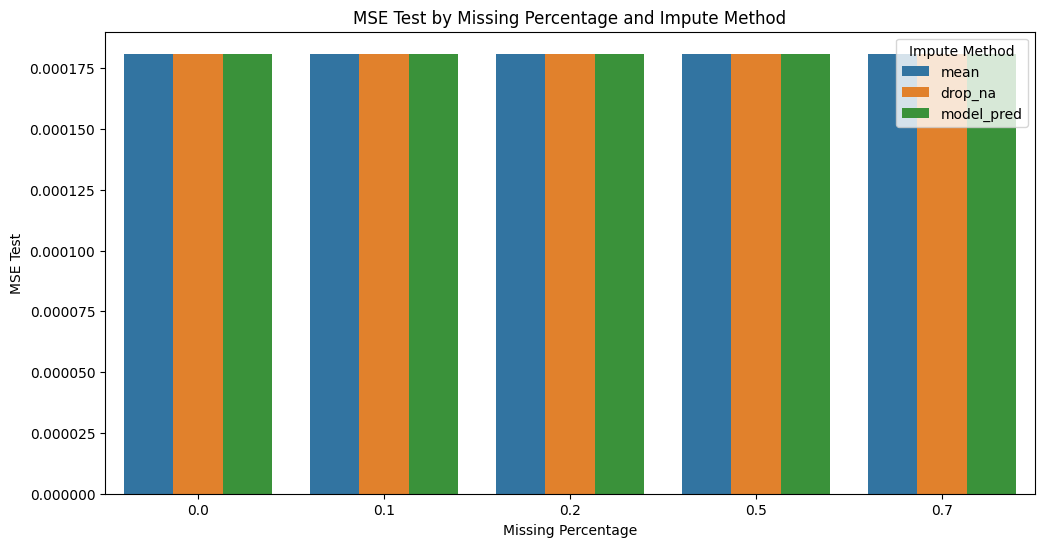

In [144]:
import seaborn as sns

import matplotlib.pyplot as plt

# Create a grouped bar plot
df = result_df[result_df['impute_method'] != '0']
plt.figure(figsize=(12, 6))
sns.barplot(x='missing_persentage', y='mse_test', hue='impute_method', data=df)

# Add labels and title
plt.xlabel('Missing Percentage')
plt.ylabel('MSE Test')
plt.title('MSE Test by Missing Percentage and Impute Method')
plt.legend(title='Impute Method')

# Show the plot
plt.show()

# Dataset House Pricing

In [145]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from missing_clf import *

house_value_train = 'input/house_pricing/train.csv'
house_value_df = pd.read_csv(house_value_train) 


missing_values = house_value_df.isnull().sum()
cols_with_missing = missing_values[missing_values > 0]
print(cols_with_missing)


LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [146]:
len(house_value_df)

1460

In [147]:
# df_full = house_value_df.copy().dropna()
# len(df_full)
missing_percentage = house_value_df.isnull().mean() * 100
missing_percentage = missing_percentage[missing_percentage > 0]
print(missing_percentage)

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


In [148]:
remove_cols = missing_percentage[missing_percentage > 10].index
remove_rows = missing_percentage[missing_percentage <= 10].index
df_full = house_value_df.copy().dropna(subset=remove_rows).drop(columns=remove_cols)
len(df_full)

1338

In [149]:
df_full.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [150]:
df_full = df_full.select_dtypes(include=['float64', 'int64'])
df_full.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [151]:
df_full.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [152]:
df_full['GarageArea'].describe()

count    1338.000000
mean      501.449925
std       186.761863
min       160.000000
25%       377.500000
50%       484.000000
75%       583.000000
max      1418.000000
Name: GarageArea, dtype: float64

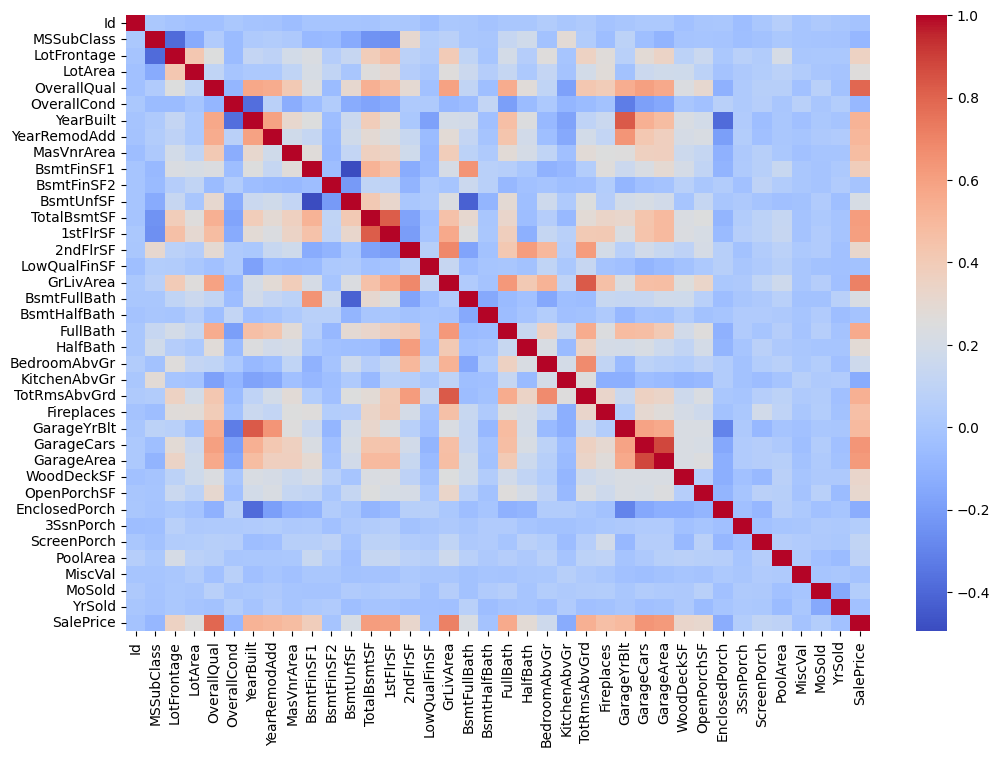

In [153]:

plt.figure(figsize=(12, 8))
sns.heatmap(house_value_df.corr(), cmap='coolwarm')
plt.show()

In [154]:
# def remove_complitly_at_random(df, feature_name, persentage):
#     df = df.copy()
#     n = int(df.shape[0] * persentage)
#     df.loc[df.sample(n=n).index, feature_name] = None
#     return df

# def remove_at_random(df: pd.DataFrame, feature_name: str, persentage: float, missing_cond: callable) -> pd.DataFrame:
#     df = df.copy()
#     df.loc[missing_cond(df).sample(frac=persentage).index, feature_name] = None
#     return df

# def remove_not_at_random(df: pd.DataFrame, feature_name: str, persentage: float, missing_cond: callable, role_feature: str='Building Type'):
#     df = remove_at_random(df, feature_name, persentage, missing_cond)
#     return df.drop(columns=[role_feature])

In [155]:
missing_feature = 'YearBuilt'
role_feature = 'GarageYrBlt'

# new_df = remove_at_random(df_full, missing_feature, 0.2, lambda x: x[x[role_feature] > 2000])
new_df = remove_complitly_at_random(df_full, missing_feature, 0.3)
# new_df = remove_not_at_random(df_full, missing_feature, 0.3, lambda x: x[x[role_feature] > 2000], role_feature)
new_df[missing_feature].isnull().sum()


401

In [156]:
# new_df.to_csv('df.csv', index=False)


In [157]:
%reload_ext autoreload
%autoreload 2
from missing_clf import classify_missing_values

acc = classify_missing_values(new_df, missing_feature)
acc

(561, 36)
Classifier Accuracy: 0.5269709543568465
Classifier Confusion Matrix:
[[72 53]
 [61 55]]
Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.58      0.56       125
           1       0.51      0.47      0.49       116

    accuracy                           0.53       241
   macro avg       0.53      0.53      0.52       241
weighted avg       0.53      0.53      0.53       241

classifier accuracy is 0.5269709543568465 - MCAR/MNAR


0.5269709543568465

In [158]:
# The Melbourne data has some missing values (some houses for which some variables weren't recorded.)
# We'll learn to handle missing values in a later tutorial.  
# Your Iowa data doesn't have missing values in the columns you use. 
# So we will take the simplest option for now, and drop houses from our data. 
# Don't worry about this much for now, though the code is:

# dropna drops missing values (think of na as "not available")
house_value_df = house_value_df.dropna(axis=0)

There are many ways to select a subset of your data. The [Pandas Micro-Course](https://www.kaggle.com/learn/pandas) covers these in more depth, but we will focus on two approaches for now.

1. Dot notation, which we use to select the "prediction target"
2. Selecting with a column list, which we use to select the "features" 

## Selecting The Prediction Target 
You can pull out a variable with **dot-notation**.  This single column is stored in a **Series**, which is broadly like a DataFrame with only a single column of data.  

We'll use the dot notation to select the column we want to predict, which is called the **prediction target**. By convention, the prediction target is called **y**. So the code we need to save the house prices in the Melbourne data is

In [159]:
y_train = house_value_df.SalePrice

# Choosing "Features"
The columns that are inputted into our model (and later used to make predictions) are called "features." In our case, those would be the columns used to determine the home price. Sometimes, you will use all columns except the target as features. Other times you'll be better off with fewer features. 

For now, we'll build a model with only a few features. Later on you'll see how to iterate and compare models built with different features.

We select multiple features by providing a list of column names inside brackets. Each item in that list should be a string (with quotes).

Here is an example:

In [160]:
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']

Let's quickly review the data we'll be using to predict house prices using the `describe` method and the `head` method, which shows the top few rows.

In [161]:
X.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,9.797079,0.774796,0.793870,31.289348,0.200245,129.442333,229.008762,1.009972,3.158712,1.020641,11.291716
std,2.413919,0.365015,0.384833,19.015391,0.124933,77.167262,100.183265,0.012032,0.171371,0.408304,1.182198
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,7.600000,0.430000,0.410000,9.800000,0.072000,45.000000,150.000000,0.997417,3.030000,0.620000,10.400000
50%,10.000000,0.830000,0.870000,37.600000,0.205000,145.800000,240.500000,1.012200,3.150000,1.080000,11.300000
75%,11.800000,1.080000,1.110000,46.800000,0.298000,194.325000,311.625000,1.019840,3.270000,1.360000,12.200000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [162]:
X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0


Visually checking your data with these commands is an important part of a data scientist's job.  You'll frequently find surprises in the dataset that deserve further inspection.

---
# Building Your Model

You will use the **scikit-learn** library to create your models.  When coding, this library is written as **sklearn**, as you will see in the sample code. Scikit-learn is easily the most popular library for modeling the types of data typically stored in DataFrames. 

The steps to building and using a model are:
* **Define:** What type of model will it be?  A decision tree?  Some other type of model? Some other parameters of the model type are specified too.
* **Fit:** Capture patterns from provided data. This is the heart of modeling.
* **Predict:** Just what it sounds like
* **Evaluate**: Determine how accurate the model's predictions are.

Here is an example of defining a decision tree model with scikit-learn and fitting it with the features and target variable.

In [163]:
from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
melbourne_model = DecisionTreeRegressor(random_state=1)

# Fit model
melbourne_model.fit(X, y_train)

ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.

Many machine learning models allow some randomness in model training. Specifying a number for `random_state` ensures you get the same results in each run. This is considered a good practice. You use any number, and model quality won't depend meaningfully on exactly what value you choose.

We now have a fitted model that we can use to make predictions.

In practice, you'll want to make predictions for new houses coming on the market rather than the houses we already have prices for. But we'll make predictions for the first few rows of the training data to see how the predict function works.


In [ ]:
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(melbourne_model.predict(X.head()))

# Your Turn
Try it out yourself in the **[Model Building Exercise](https://www.kaggle.com/kernels/fork/400771)**

---
**[Machine Learning Home Page](https://www.kaggle.com/learn/intro-to-machine-learning)**





*Have questions or comments? Visit the [Learn Discussion forum](https://www.kaggle.com/learn-forum) to chat with other Learners.*